In [ ]:
%load_ext autoreload
%autoreload 2
from fastai.vision.all import *

In [ ]:
from MLfix import MLfix

## Load crops and labels into a Pandas DataFrame

In [ ]:
path = Path('yolo-bbox-crops-aspects')

In [ ]:
fnames = get_image_files(path)

In [ ]:
data = pd.DataFrame(dict(fname = fnames), index = [str(x) for x in fnames])
data['label'] = data.fname.map(lambda x: x.parent.name)
data['photo_id'] = data['fname'].apply(lambda x: re.sub("-[0-9]+.jpg", "", Path(x).name))

In [ ]:
data

,fname,label,photo_id
yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/a3K73YQChXmdfsn69D1kjA-1.jpg,yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/a3K73YQChXmdfsn69D1kjA-1.jpg,warning--winding-road-first-left--g1,a3K73YQChXmdfsn69D1kjA
yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/l8GLcMia5zPhB7Q1agVYTg-0.jpg,yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/l8GLcMia5zPhB7Q1agVYTg-0.jpg,warning--winding-road-first-left--g1,l8GLcMia5zPhB7Q1agVYTg
yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/BCxKRFT-Wvn49LnVoSlOgw-0.jpg,yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/BCxKRFT-Wvn49LnVoSlOgw-0.jpg,warning--winding-road-first-left--g1,BCxKRFT-Wvn49LnVoSlOgw
yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/5D1e0maBSjs1UaV5tE2MHg-0.jpg,yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/5D1e0maBSjs1UaV5tE2MHg-0.jpg,warning--winding-road-first-left--g1,5D1e0maBSjs1UaV5tE2MHg
yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/Oz7f7PDh0FZogR2Lle9HsQ-1.jpg,yolo-bbox-crops-aspects/warning--winding-road-first-left--g1/Oz7f7PDh0FZogR2Lle9HsQ-1.jpg,warning--winding-road-first-left--g1,Oz7f7PDh0FZogR2Lle9HsQ
...,...,...,...
yolo-bbox-crops-aspects/complementary--one-direction-left--g1/jz9ydBI3G46OM_DSDxRI2Q-3.jpg,yolo-bbox-crops-aspects/complementary--one-direction-left--g1/jz9ydBI3G46OM_DSDxRI2Q-3.jpg,complementary--one-direction-left--g1,jz9ydBI3G46OM_DSDxRI2Q
yolo-bbox-crops-aspects/complementary--one-direction-left--g1/jjP8oXmH91HYeNRRZy36ig-1.jpg,yolo-bbox-crops-aspects/complementary--one-direction-left--g1/jjP8oXmH91HYeNRRZy36ig-1.jpg,complementary--one-direction-left--g1,jjP8oXmH91HYeNRRZy36ig
yolo-bbox-crops-aspects/complementary--one-direction-left--g1/PrXKSuASmK0TB3tqCLVY9A-4.jpg,yolo-bbox-crops-aspects/complementary--one-direction-left--g1/PrXKSuASmK0TB3tqCLVY9A-4.jpg,complementary--one-direction-left--g1,PrXKSuASmK0TB3tqCLVY9A
yolo-bbox-crops-aspects/complementary--one-direction-left--g1/DdilxFWJ13kSsBTDlCNCcg-2.jpg,yolo-bbox-crops-aspects/complementary--one-direction-left--g1/DdilxFWJ13kSsBTDlCNCcg-2.jpg,complementary--one-direction-left--g1,DdilxFWJ13kSsBTDlCNCcg


## Find all the signs with "speed" in the label

In [ ]:
speed_limits = data[data['label'].str.contains("speed")].copy()
speed_limits['new_label'] = speed_limits['label']

In [ ]:
# if you don't want to do all the work yourself you can load the result of the analysis we did
invalid = pd.read_csv('invalid-speed-limits.csv', index_col=0)
speed_limits.loc[invalid.index, 'new_label'] = 'invalid'

## Run MLfix

In [ ]:
new_labels = MLfix(
    speed_limits,
    group='label',
    label='new_label',
    sort='fname',
    size=200,
    label_icons={x:'icons/' + x + '.svg' for x in speed_limits['label'].unique()}
)

In [ ]:
# How many changes did we make?
print(f"{(speed_limits['label'] != speed_limits['new_label']).mean() * 100:.2f} %")

2.96 %


In [ ]:
def sample_epoch(self):
    item_labels = self.items['label']
    label_freq = {label:count for label, count in zip(*np.unique(item_labels, return_counts=True))}
    weights = [1/label_freq[label] for label in item_labels]
    return random.choices(range(len(self.items)), weights=weights, k=len(self.items))

In [ ]:
chevron_groups = [
        "complementary--chevron-left--g1",
        "complementary--chevron-left--g2",
        "complementary--chevron-left--g3",
        "complementary--chevron-left--g4",
        "complementary--chevron-left--g5",
]
new_labels = MLfix(
    data[data['label'].str.startswith('complementary--chevron-left--')],
    group='label',
    label='label',
    size=200,
    hotkey_labels=chevron_groups,
    label_icons={x:'icons/' + x + '.svg' for x in chevron_groups}
)

data/
data/
data/


In [ ]:
data['valid'] = pd.Series(dtype=np.bool_)
data['valid'] = False

In [ ]:
def set_valid_split(df, sel, p=0.2):
    sel = random.sample(list(df.index[sel]), int(sel.sum() * p))
    df.loc[sel, 'valid'] = True

In [ ]:
random.seed(42)
for label in data['label'].unique():
    set_valid_split(data, data['label'] == label, p=0.5)

In [ ]:
data.describe()

,fname,label,invalid,valid
count,206383,206383,206383,206383
unique,206383,401,2,2
top,warning--winding-road-first-left--g1/a3K73YQChXmdfsn69D1kjA-1.jpg,other-sign,False,False
freq,1,135956,206216,103277


In [ ]:
data.groupby('label').mean('valid')

,invalid,valid
label,,
complementary--accident-area--g3,0.0,0.500000
complementary--both-directions--g1,0.0,0.500000
complementary--buses--g1,0.0,0.500000
complementary--chevron-left--g1,0.0,0.500000
complementary--chevron-left--g2,0.0,0.500000
...,...,...
warning--winding-road-first-left--g2,0.0,0.500000
warning--winding-road-first-right--g1,0.0,0.500000
warning--winding-road-first-right--g3,0.0,0.484848


In [ ]:
from albumentations import Blur

In [ ]:
class AlbumentationsTransform(Transform):
    split_idx = 0
    def __init__(self, aug): self.aug = aug
    def encodes(self, img: PILImage):
        aug_img = self.aug(image=np.array(img))['image']
        return PILImage.create(aug_img)

In [ ]:
dls = ImageDataLoaders.from_df(
    data, path=path, label_col='label', valid_col='valid',
    bs=1024,
    item_tfms=[AlbumentationsTransform(Blur(blur_limit=5, p=0.25))],
    batch_tfms=aug_transforms(do_flip=False),
)

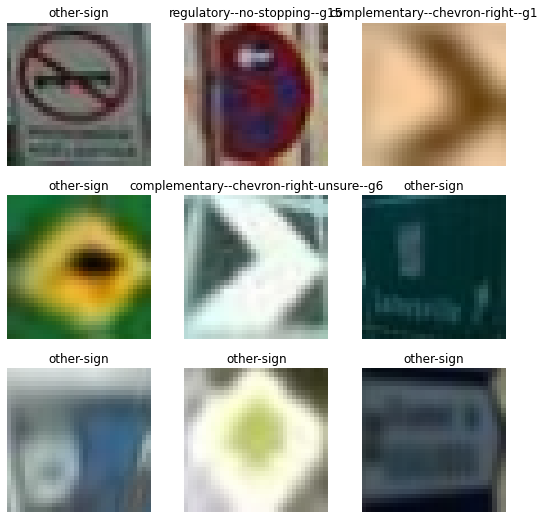

In [ ]:
dls.show_batch()

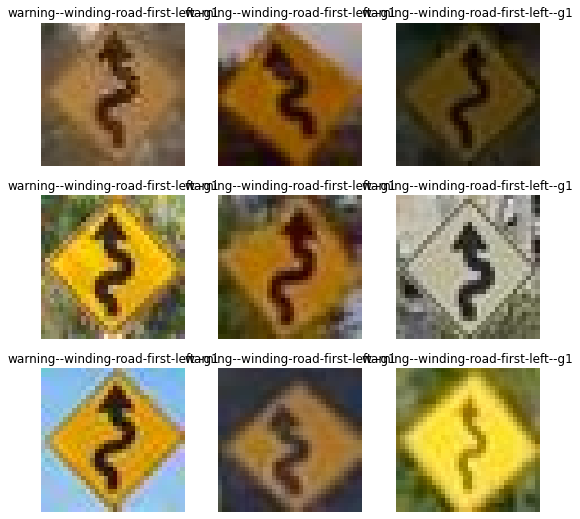

In [ ]:
dls.valid.show_batch()

SuggestedLRs(valley=0.0008317637839354575)

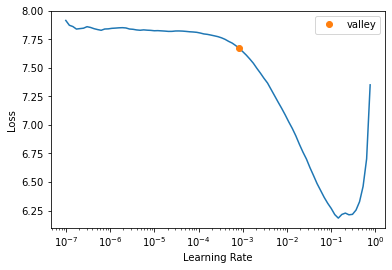

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate])
learn.dls.train.get_idxs = types.MethodType(sample_epoch, learn.dls.train)
learn.lr_find()

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate])
learn.dls.train.get_idxs = types.MethodType(sample_epoch, learn.dls.train)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,5.079092,6.091725,0.924282,00:30


icon: complementary--chevron-left--g1 icons/complementary--chevron-left--g1.svg


epoch,train_loss,valid_loss,error_rate,time
0,3.031179,5.601538,0.871123,00:31
1,2.167284,5.218641,0.818565,00:30
2,1.386633,4.622600,0.736669,00:29
3,0.847007,4.701922,0.712257,00:30
4,0.544369,4.392797,0.669980,00:30
5,0.381517,4.105965,0.625007,00:31
6,0.280622,3.848773,0.580694,00:30
7,0.212546,3.584036,0.544663,00:29
8,0.170309,3.524228,0.538058,00:31
9,0.141544,3.457462,0.532966,00:31


icon: complementary--chevron-left--g2 icons/complementary--chevron-left--g2.svg
icon: complementary--chevron-left--g3 icons/complementary--chevron-left--g3.svg
icon: complementary--chevron-left--g4 icons/complementary--chevron-left--g4.svg
icon: complementary--chevron-left--g5 icons/complementary--chevron-left--g5.svg


In [ ]:
chevrons = val.loc[val['label'].str.startswith('complementary--chevron-left')].copy()
chevrons['corrected'] = chevrons['label']

In [ ]:
(chevrons['pred'] != chevrons['label']).mean()

0.06056236481614996

In [ ]:
class MLfixFile2:
    def __init__(self, df, label='label', sort='score', group=None, invalid_group='invalid', group_labels=[], text=None, **opts):
        self.df = df
        self.opts = opts
        self.group_labels = group_labels
        self.invalid_group = invalid_group
        if invalid_group not in self.group_labels: self.group_labels.append(invalid_group)
        self.label_col = label
        self.sort_col = sort
        self.group_col = group
        self.text_col = text
        if self.label_col in df:
            self.clusters = []
            for name,rows in df.groupby(self.label_col):
                self.add_group(name, rows)
        if self.group_col not in df:
            df[self.group_col] = pd.Series([], dtype=object)
            
    def add_group(self, name, rows):
        if self.sort_col in rows:
            rows = rows.sort_values(self.sort_col)
        photos = []
        for row in rows.itertuples():
            photo = dict(dist_to_mean=0,
                murl=str(row.fname),
                idx=str(row.Index)
            )
            photo['group'] = getattr(row, self.group_col)
            if self.text_col and hasattr(row, self.text_col):
                photo['label'] = getattr(row, self.text_col)
            photos.append(photo)
        self.clusters.append(dict(
            name = f"{name}",
            photos = photos
        ))

    @cherrypy.expose
    def icons(self, group):
        return cherrypy.lib.static.serve_file(str(Path(self.opts['group_icons'][group]).absolute()))

    def _cp_dispatch(self, vpath):
        if len(vpath) > 1 and vpath[0] == 'icons' and 'group_icons' in self.opts:
            cherrypy.request.params['group'] = vpath.pop(1)
            return vpath

        return vpath

    @cherrypy.expose
    def data(self):
        data = self.opts.copy()
        data['invalid_group'] = self.invalid_group
        data['labeled_clusters'] = self.clusters
        data['group_labels'] = self.group_labels
        return json.dumps(data)

    @cherrypy.expose
    def set_group(self, idx, group):
        print(idx, '-> group:', group)
        self.df.at[idx,self.group_col] = group
        
    def display(self):
        cherrypy.tree.mount(self, '/', {
            '/': {
                'tools.staticdir.on': True,
                'tools.staticdir.dir': Path('../bing-manual').absolute(),
                'tools.staticdir.index': 'index.html',
            },
            '/imgs': {
                'tools.staticdir.on': True,
                'tools.staticdir.dir': path.absolute(),
            }
        })
        frameid = 'mlfix-' + ''.join(random.choices(string.ascii_letters + string.digits, k=5))
        display(HTML("""
        <style>
            .mlfix-container {
                position: relative;
                background-color: white;
            }
            .mlfix-fullscreen {
                width: 100%;
                height: 100%;
                position: absolute;
                top: 0;
                left: 0;
                z-index: 10000;
            }
            .mlfix-fullscreen iframe {
                height: 100%;
            }
        </style>
        <div id="""+frameid+"""-container class=mlfix-container>
            <iframe id="""+frameid+""" src="/proxy/"""+str(cherrypy.server.bound_addr[1])+"""/#"""+frameid+""""
                width="100%" height="500px" frameborder="0" allowfullscreen></iframe>
            <script>(function () {
                var iframe = document.getElementById('"""+frameid+"""');
                var outputEl = iframe.parentNode;
                var parentEl = outputEl.parentNode;
                console.log('MLfix init:', outputEl, parentEl);
                var bringMLfixIframeToFocus = function() {
                    iframe.contentWindow.focus();
                }
                setTimeout(bringMLfixIframeToFocus, 100);

                var isFullscreen = false;
                var parentEl;
                window.addEventListener('message', (ev) => {
                    //console.log('window message:', ev.data);
                    if (ev.data == 'mlfix-toggle-fullscreen-"""+frameid+"""') {
                        if (!isFullscreen) {
                            $(outputEl).appendTo(document.body).addClass('mlfix-fullscreen');
                        } else {
                            $(outputEl).appendTo(parentEl).removeClass('mlfix-fullscreen');
                        }
                        isFullscreen = !isFullscreen;
                        console.log('fullscreen', isFullscreen);
                        setTimeout(bringMLfixIframeToFocus, 100);
                    }
                });
            })();</script>
        </div>
        """))

In [ ]:
chevron_groups = [
        "complementary--chevron-left--g1",
        "complementary--chevron-left--g2",
        "complementary--chevron-left--g3",
        "complementary--chevron-left--g4",
        "complementary--chevron-left--g5",
]
MLfixFile2(
    chevrons,
    label='label',
    group='corrected',
    sort='loss',
    size=200,
    group_labels=chevron_groups,
    group_icons={x:'icons/' + x + '.svg' for x in chevron_groups}
).display()

complementary--chevron-left--g1/fkzkWuTzvxZmOrETtfAzbg-0.jpg -> group: complementary--chevron-left--g3
complementary--chevron-left--g1/fkzkWuTzvxZmOrETtfAzbg-0.jpg -> group: complementary--chevron-left--g2
complementary--chevron-left--g1/_AMTVNEBtCJ6x7RY1XViBA-1.jpg -> group: complementary--chevron-left--g1
complementary--chevron-left--g1/fkzkWuTzvxZmOrETtfAzbg-0.jpg -> group: complementary--chevron-left--g1
complementary--chevron-left--g1/3xEUQ8B8rcNMBi9VHrZJ3Q-2.jpg -> group: complementary--chevron-left--g2
complementary--chevron-left--g1/oidhlZX2u1bYpfKVPuxUhQ-5.jpg -> group: complementary--chevron-left--g2
complementary--chevron-left--g1/oidhlZX2u1bYpfKVPuxUhQ-5.jpg -> group: complementary--chevron-left--g1
complementary--chevron-left--g1/3xEUQ8B8rcNMBi9VHrZJ3Q-2.jpg -> group: complementary--chevron-left--g1
complementary--chevron-left--g1/3xEUQ8B8rcNMBi9VHrZJ3Q-2.jpg -> group: complementary--chevron-left--g2
complementary--chevron-left--g1/3xEUQ8B8rcNMBi9VHrZJ3Q-2.jpg -> group: co

In [ ]:
chevrons[chevrons['corrected'] != chevrons['label']]

,fname,label,invalid,valid,pred,loss,corrected,None
complementary--chevron-left--g1/STw8jbaiKJHgTt7clHYX7w-14.jpg,complementary--chevron-left--g1/STw8jbaiKJHgTt7clHYX7w-14.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.291499,complementary--chevron-left--g5,NaN
complementary--chevron-left--g1/3KIZfTdWpV-RntKDkiwdHw-2.jpg,complementary--chevron-left--g1/3KIZfTdWpV-RntKDkiwdHw-2.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.108359,complementary--chevron-left--g2,NaN
complementary--chevron-left--g1/gMAw7IVKlvCOfTXD1u2Byw-2.jpg,complementary--chevron-left--g1/gMAw7IVKlvCOfTXD1u2Byw-2.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.003712,complementary--chevron-left--g2,NaN
complementary--chevron-left--g1/KwvXmPhc8Jw0WZTEXGCPVg-0.jpg,complementary--chevron-left--g1/KwvXmPhc8Jw0WZTEXGCPVg-0.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.002079,complementary--chevron-left--g5,NaN
complementary--chevron-left--g1/_I8ij42B8f1iuNfm9GkA8Q-2.jpg,complementary--chevron-left--g1/_I8ij42B8f1iuNfm9GkA8Q-2.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.055953,invalid,True
...,...,...,...,...,...,...,...,...
complementary--chevron-left--g3/pQLC9vIPkZQaWjSfb-u6Dg-1.jpg,complementary--chevron-left--g3/pQLC9vIPkZQaWjSfb-u6Dg-1.jpg,complementary--chevron-left--g3,False,True,complementary--chevron-left--g3,-0.000093,complementary--chevron-left--g4,NaN
complementary--chevron-left--g3/Fc0_DtAb--TZwvZxLlL6dA-8.jpg,complementary--chevron-left--g3/Fc0_DtAb--TZwvZxLlL6dA-8.jpg,complementary--chevron-left--g3,False,True,complementary--chevron-left--g3,-0.000986,invalid,True
complementary--chevron-left--g3/Nn24AzuwNxYdRIFeI2AoXA-1.jpg,complementary--chevron-left--g3/Nn24AzuwNxYdRIFeI2AoXA-1.jpg,complementary--chevron-left--g3,False,True,complementary--chevron-left--g3,-0.000045,complementary--chevron-left--g4,NaN
complementary--chevron-left--g5/dJWXQSPEq0xTRT5Zt-oyag-9.jpg,complementary--chevron-left--g5/dJWXQSPEq0xTRT5Zt-oyag-9.jpg,complementary--chevron-left--g5,False,True,complementary--chevron-left--g1,-8.979251,complementary--chevron-left--g1,NaN


In [ ]:
chevrons[chevrons['corrected'] == 'invalid']

,fname,label,invalid,valid,pred,loss,corrected,None
complementary--chevron-left--g1/_I8ij42B8f1iuNfm9GkA8Q-2.jpg,complementary--chevron-left--g1/_I8ij42B8f1iuNfm9GkA8Q-2.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.055953,invalid,True
complementary--chevron-left--g1/XMZKSQr0cuWLoFRMwWjTRQ-3.jpg,complementary--chevron-left--g1/XMZKSQr0cuWLoFRMwWjTRQ-3.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.023959,invalid,True
complementary--chevron-left--g1/o3OE1AfaAwiro0b-effwnQ-7.jpg,complementary--chevron-left--g1/o3OE1AfaAwiro0b-effwnQ-7.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.018589,invalid,True
complementary--chevron-left--g1/UjwAOCv1G34khaBfgNuyJA-2.jpg,complementary--chevron-left--g1/UjwAOCv1G34khaBfgNuyJA-2.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.023150,invalid,True
complementary--chevron-left--g1/syczzNHsV2xOC8cmVtiZ7Q-4.jpg,complementary--chevron-left--g1/syczzNHsV2xOC8cmVtiZ7Q-4.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.001950,invalid,True
...,...,...,...,...,...,...,...,...
complementary--chevron-left--g2/t5sAZajdwwyDcFFtZhFO5g-7.jpg,complementary--chevron-left--g2/t5sAZajdwwyDcFFtZhFO5g-7.jpg,complementary--chevron-left--g2,False,True,complementary--chevron-left--g2,-0.015914,invalid,True
complementary--chevron-left--g2/LhOBpYYM67G6qoHcmF-iPw-3.jpg,complementary--chevron-left--g2/LhOBpYYM67G6qoHcmF-iPw-3.jpg,complementary--chevron-left--g2,False,True,complementary--chevron-left--g2,-0.318769,invalid,True
complementary--chevron-left--g2/vcKJG0vrJkzB3E9I-W1-5g-3.jpg,complementary--chevron-left--g2/vcKJG0vrJkzB3E9I-W1-5g-3.jpg,complementary--chevron-left--g2,False,True,complementary--chevron-left--g2,-0.026636,invalid,True
complementary--chevron-left--g3/Fc0_DtAb--TZwvZxLlL6dA-8.jpg,complementary--chevron-left--g3/Fc0_DtAb--TZwvZxLlL6dA-8.jpg,complementary--chevron-left--g3,False,True,complementary--chevron-left--g3,-0.000986,invalid,True


In [ ]:
len(chev)

In [ ]:
len(chevrons), len(chevrons) / len(data)

(1387, 0.006720514771080951)

In [ ]:
326/len(data) * 100

0.15795874660219106

In [ ]:
chevrons['invalid'].sum()

0

In [ ]:
chevrons.to_pickle('chevrons.pd')

In [ ]:
chevrons = pd.read_pickle('chevrons.pd')

In [ ]:
(chevrons['pred'] != chevrons['label']).mean()

0.06056236481614996

In [ ]:
(chevrons['pred'] != chevrons['corrected'])[chevrons['corrected'] != 'invalid'].mean()

0.20440729483282674

In [ ]:
mirror = data.copy()
mirror['valid'] = ~data['valid']
#chevrons['corrected']
#mirror['label']

In [ ]:
dls = ImageDataLoaders.from_df(
    mirror, path=path, label_col='label', valid_col='valid',
    bs=1024,
    item_tfms=[AlbumentationsTransform(Blur(blur_limit=5, p=0.25))],
    batch_tfms=aug_transforms(do_flip=False),
)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate])
learn.dls.train.get_idxs = types.MethodType(sample_epoch, learn.dls.train)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,5.086249,6.028560,0.926479,00:27


epoch,train_loss,valid_loss,error_rate,time
0,3.021924,5.719494,0.875994,00:28
1,2.165450,5.413651,0.819001,00:27
2,1.367490,5.059329,0.757477,00:27
3,0.840482,4.647243,0.704765,00:27
4,0.543618,4.493270,0.677653,00:28
5,0.382607,4.082226,0.623769,00:27
6,0.277245,3.842886,0.582966,00:28
7,0.222408,3.623310,0.550965,00:27
8,0.178094,3.604002,0.539859,00:27
9,0.145871,3.308730,0.506560,00:28


In [ ]:
preds,y,py,losses = learn.get_preds(with_loss=True, with_decoded=True)

In [ ]:
val = learn.dls[1].items.copy()
val['pred'] = py
val['pred'] = val['pred'].map(lambda x: learn.dls.vocab[x])
val['loss'] = -losses

In [ ]:
val_flt = val[(val['label'] != 'other-sign')]

In [ ]:
(val_flt['pred'] != val_flt['label']).mean()

0.13870081305419418

In [ ]:
mirror = data.copy()
mirror['valid'] = ~data['valid']
mirror.loc[chevrons.index, 'label'] = chevrons['corrected']
mirror = mirror[mirror['label'] != 'invalid'].copy()
mirror

,fname,label,invalid,valid
warning--winding-road-first-left--g1/a3K73YQChXmdfsn69D1kjA-1.jpg,warning--winding-road-first-left--g1/a3K73YQChXmdfsn69D1kjA-1.jpg,warning--winding-road-first-left--g1,False,True
warning--winding-road-first-left--g1/l8GLcMia5zPhB7Q1agVYTg-0.jpg,warning--winding-road-first-left--g1/l8GLcMia5zPhB7Q1agVYTg-0.jpg,warning--winding-road-first-left--g1,False,False
warning--winding-road-first-left--g1/BCxKRFT-Wvn49LnVoSlOgw-0.jpg,warning--winding-road-first-left--g1/BCxKRFT-Wvn49LnVoSlOgw-0.jpg,warning--winding-road-first-left--g1,False,True
warning--winding-road-first-left--g1/5D1e0maBSjs1UaV5tE2MHg-0.jpg,warning--winding-road-first-left--g1/5D1e0maBSjs1UaV5tE2MHg-0.jpg,warning--winding-road-first-left--g1,False,True
warning--winding-road-first-left--g1/Oz7f7PDh0FZogR2Lle9HsQ-1.jpg,warning--winding-road-first-left--g1/Oz7f7PDh0FZogR2Lle9HsQ-1.jpg,warning--winding-road-first-left--g1,False,True
...,...,...,...,...
complementary--one-direction-left--g1/jz9ydBI3G46OM_DSDxRI2Q-3.jpg,complementary--one-direction-left--g1/jz9ydBI3G46OM_DSDxRI2Q-3.jpg,complementary--one-direction-left--g1,False,True
complementary--one-direction-left--g1/jjP8oXmH91HYeNRRZy36ig-1.jpg,complementary--one-direction-left--g1/jjP8oXmH91HYeNRRZy36ig-1.jpg,complementary--one-direction-left--g1,False,False
complementary--one-direction-left--g1/PrXKSuASmK0TB3tqCLVY9A-4.jpg,complementary--one-direction-left--g1/PrXKSuASmK0TB3tqCLVY9A-4.jpg,complementary--one-direction-left--g1,False,True
complementary--one-direction-left--g1/DdilxFWJ13kSsBTDlCNCcg-2.jpg,complementary--one-direction-left--g1/DdilxFWJ13kSsBTDlCNCcg-2.jpg,complementary--one-direction-left--g1,False,False


In [ ]:
dls = ImageDataLoaders.from_df(
    mirror, path=path, label_col='label', valid_col='valid',
    bs=1024,
    item_tfms=[AlbumentationsTransform(Blur(blur_limit=5, p=0.25))],
    batch_tfms=aug_transforms(do_flip=False),
)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate])
learn.dls.train.get_idxs = types.MethodType(sample_epoch, learn.dls.train)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,5.077369,6.012372,0.925889,00:26


epoch,train_loss,valid_loss,error_rate,time
0,3.007262,5.601548,0.872760,00:27
1,2.153915,5.170571,0.821054,00:28
2,1.362319,4.792474,0.747340,00:27
3,0.840182,4.546010,0.693417,00:28
4,0.543795,4.394051,0.664514,00:28
5,0.364156,3.988784,0.604781,00:28
6,0.275639,3.811821,0.568103,00:28
7,0.212912,3.505237,0.549135,00:28
8,0.167912,3.521998,0.546094,00:28
9,0.138587,3.367808,0.522904,00:28


In [ ]:
preds,y,py,losses = learn.get_preds(with_loss=True, with_decoded=True)

In [ ]:
val = learn.dls[1].items.copy()
val['pred'] = py
val['pred'] = val['pred'].map(lambda x: learn.dls.vocab[x])
val['loss'] = -losses

In [ ]:
val_flt = val[(val['label'] != 'other-sign')]

In [ ]:
(val_flt['pred'] != val_flt['label']).mean()

0.13870081305419418

In [ ]:
chevrons = val.loc[val['label'].str.startswith('complementary--chevron-left')].copy()
chevrons['corrected'] = chevrons['pred']

In [ ]:
(chevrons['pred'] != chevrons['label']).mean()

0.0734341252699784

In [ ]:
(chevrons['corrected'] != chevrons['pred']).mean()

0.2476601871850252

In [ ]:
(chevrons['corrected'] != chevrons['pred']).mean()

0.2476601871850252

In [ ]:
chevron_groups = [
        "complementary--chevron-left--g1",
        "complementary--chevron-left--g2",
        "complementary--chevron-left--g3",
        "complementary--chevron-left--g4",
        "complementary--chevron-left--g5",
]
MLfixFile2(
    chevrons,
    label='label',
    group='corrected',
    sort='loss',
    size=200,
    group_labels=chevron_groups,
    group_icons={x:'icons/' + x + '.svg' for x in chevron_groups}
).display()

complementary--chevron-left--g5/FW966yPRYpC9WYaG8gT8BA-2.jpg -> group: invalid
complementary--chevron-left--g5/1BS0QTJcirHw_FcD6ctS1Q-1.jpg -> group: complementary--chevron-left--g5
complementary--chevron-left--g5/kL9IH7wK-c5IiRieFjAGgA-8.jpg -> group: complementary--chevron-left--g2
complementary--chevron-left--g5/v_A1aK4W9EcwEU8cacEnwg-9.jpg -> group: invalid
complementary--chevron-left--g5/pMVFGQ4TMufkjikcUNx_lw-0.jpg -> group: complementary--chevron-left--g2


In [ ]:
chevrons1 = pd.read_pickle('chevrons.pd')

In [ ]:
(chevrons['label'] != chevrons['corrected']).sum()

347

In [ ]:
(chevrons['corrected'] == 'invalid').sum()

82

In [ ]:
chevrons.to_pickle('chevrons2.pd')

In [ ]:
mirror = data.copy()
mirror['valid'] = ~data['valid']
mirror.loc[chevrons.index, 'label'] = chevrons['corrected']
mirror.loc[chevrons1.index, 'label'] = chevrons1['corrected']
mirror = mirror[mirror['label'] != 'invalid'].copy()
mirror

,fname,label,invalid,valid
warning--winding-road-first-left--g1/a3K73YQChXmdfsn69D1kjA-1.jpg,warning--winding-road-first-left--g1/a3K73YQChXmdfsn69D1kjA-1.jpg,warning--winding-road-first-left--g1,False,True
warning--winding-road-first-left--g1/l8GLcMia5zPhB7Q1agVYTg-0.jpg,warning--winding-road-first-left--g1/l8GLcMia5zPhB7Q1agVYTg-0.jpg,warning--winding-road-first-left--g1,False,False
warning--winding-road-first-left--g1/BCxKRFT-Wvn49LnVoSlOgw-0.jpg,warning--winding-road-first-left--g1/BCxKRFT-Wvn49LnVoSlOgw-0.jpg,warning--winding-road-first-left--g1,False,True
warning--winding-road-first-left--g1/5D1e0maBSjs1UaV5tE2MHg-0.jpg,warning--winding-road-first-left--g1/5D1e0maBSjs1UaV5tE2MHg-0.jpg,warning--winding-road-first-left--g1,False,True
warning--winding-road-first-left--g1/Oz7f7PDh0FZogR2Lle9HsQ-1.jpg,warning--winding-road-first-left--g1/Oz7f7PDh0FZogR2Lle9HsQ-1.jpg,warning--winding-road-first-left--g1,False,True
...,...,...,...,...
complementary--one-direction-left--g1/jz9ydBI3G46OM_DSDxRI2Q-3.jpg,complementary--one-direction-left--g1/jz9ydBI3G46OM_DSDxRI2Q-3.jpg,complementary--one-direction-left--g1,False,True
complementary--one-direction-left--g1/jjP8oXmH91HYeNRRZy36ig-1.jpg,complementary--one-direction-left--g1/jjP8oXmH91HYeNRRZy36ig-1.jpg,complementary--one-direction-left--g1,False,False
complementary--one-direction-left--g1/PrXKSuASmK0TB3tqCLVY9A-4.jpg,complementary--one-direction-left--g1/PrXKSuASmK0TB3tqCLVY9A-4.jpg,complementary--one-direction-left--g1,False,True
complementary--one-direction-left--g1/DdilxFWJ13kSsBTDlCNCcg-2.jpg,complementary--one-direction-left--g1/DdilxFWJ13kSsBTDlCNCcg-2.jpg,complementary--one-direction-left--g1,False,False


In [ ]:
dls = ImageDataLoaders.from_df(
    mirror, path=path, label_col='label', valid_col='valid',
    bs=1024,
    item_tfms=[AlbumentationsTransform(Blur(blur_limit=5, p=0.25))],
    batch_tfms=aug_transforms(do_flip=False),
)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate])
learn.dls.train.get_idxs = types.MethodType(sample_epoch, learn.dls.train)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,5.024436,6.023483,0.927913,00:27


epoch,train_loss,valid_loss,error_rate,time
0,3.002621,5.742830,0.874170,00:28
1,2.163244,5.342408,0.823083,00:28
2,1.376949,4.849100,0.753641,00:27
3,0.834425,4.846983,0.724987,00:28
4,0.526092,4.439445,0.659528,00:28
5,0.361762,4.128017,0.618858,00:28
6,0.273085,3.812862,0.591967,00:28
7,0.215335,3.473040,0.540055,00:27
8,0.168322,3.439951,0.531828,00:27
9,0.134989,3.444489,0.546073,00:28


In [ ]:
preds,y,py,losses = learn.get_preds(with_loss=True, with_decoded=True)

In [ ]:
val3 = learn.dls[1].items.copy()
val3['pred'] = py
val3['pred'] = val3['pred'].map(lambda x: learn.dls.vocab[x])
val3['loss'] = -losses

In [ ]:
val3_flt = val3[(val3['label'] != 'other-sign')]

In [ ]:
(val3_flt['pred'] != val3_flt['label']).mean()

0.14007439588834938

In [ ]:
chevrons1 = pd.read_pickle('chevrons.pd')
chevrons2 = pd.read_pickle('chevrons2.pd')

In [ ]:
val3.loc[chevrons2.index[0]]

fname      complementary--chevron-left--g1/O5H04nSViSQQf-e_mD0hZQ-0.jpg
label                                   complementary--chevron-left--g1
invalid                                                           False
valid                                                              True
pred                                    complementary--chevron-left--g1
loss                                                          -0.006568
Name: complementary--chevron-left--g1/O5H04nSViSQQf-e_mD0hZQ-0.jpg, dtype: object

In [ ]:
val3.loc[chevrons2[chevrons2['corrected'] != 'invalid'].index]

,fname,label,invalid,valid,pred,loss
complementary--chevron-left--g1/O5H04nSViSQQf-e_mD0hZQ-0.jpg,complementary--chevron-left--g1/O5H04nSViSQQf-e_mD0hZQ-0.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.006568
complementary--chevron-left--g1/WQHyjx_xaYXg1OsLWY5DVg-0.jpg,complementary--chevron-left--g1/WQHyjx_xaYXg1OsLWY5DVg-0.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.016900
complementary--chevron-left--g1/P3v4bTqwLRx1aItzzTqKrA-4.jpg,complementary--chevron-left--g1/P3v4bTqwLRx1aItzzTqKrA-4.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.009794
complementary--chevron-left--g1/_sxL-VxyPZH3Vz_tvy4eEw-1.jpg,complementary--chevron-left--g1/_sxL-VxyPZH3Vz_tvy4eEw-1.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.010090
complementary--chevron-left--g1/57PYyWsUWv7Zw09MeMqUSA-9.jpg,complementary--chevron-left--g1/57PYyWsUWv7Zw09MeMqUSA-9.jpg,complementary--chevron-left--g1,False,True,complementary--chevron-left--g1,-0.700759
...,...,...,...,...,...,...
complementary--chevron-left--g5/fiTKiSL0cRYWmaJWFdxw-g-4.jpg,complementary--chevron-left--g5/fiTKiSL0cRYWmaJWFdxw-g-4.jpg,complementary--chevron-left--g5,False,True,complementary--chevron-left--g5,-0.000005
complementary--chevron-left--g5/v_A1aK4W9EcwEU8cacEnwg-8.jpg,complementary--chevron-left--g5/v_A1aK4W9EcwEU8cacEnwg-8.jpg,complementary--chevron-left--g5,False,True,complementary--chevron-left--g5,-0.000024
complementary--chevron-left--g5/eB3f85xKiPZLvq8Is8GpRQ-0.jpg,complementary--chevron-left--g5/eB3f85xKiPZLvq8Is8GpRQ-0.jpg,complementary--chevron-left--g5,False,True,complementary--chevron-left--g5,-0.000048
complementary--chevron-left--g5/569K1cLxEz6Cz4Bw8qld1A-2.jpg,complementary--chevron-left--g5/569K1cLxEz6Cz4Bw8qld1A-2.jpg,complementary--chevron-left--g5,False,True,complementary--chevron-left--g5,-0.000106


In [ ]:
fixed_chevrons = pd.concat([chevrons1, chevrons2])
fixed_chevrons =  fixed_chevrons[fixed_chevrons['corrected'] != 'invalid'].copy()

In [ ]:
(fixed_chevrons['label'] != fixed_chevrons['corrected']).mean()

0.19672131147540983

In [ ]:
(fixed_chevrons['corrected'] == 'invalid').mean()

0.0

In [ ]:
(val3.loc[chevrons2[chevrons2['corrected'] != 'invalid'].index]['label'] == chevrons2[chevrons2['corrected'] != 'invalid']['corrected'])

complementary--chevron-left--g1/O5H04nSViSQQf-e_mD0hZQ-0.jpg    True
complementary--chevron-left--g1/WQHyjx_xaYXg1OsLWY5DVg-0.jpg    True
complementary--chevron-left--g1/P3v4bTqwLRx1aItzzTqKrA-4.jpg    True
complementary--chevron-left--g1/_sxL-VxyPZH3Vz_tvy4eEw-1.jpg    True
complementary--chevron-left--g1/57PYyWsUWv7Zw09MeMqUSA-9.jpg    True
                                                                ... 
complementary--chevron-left--g5/fiTKiSL0cRYWmaJWFdxw-g-4.jpg    True
complementary--chevron-left--g5/v_A1aK4W9EcwEU8cacEnwg-8.jpg    True
complementary--chevron-left--g5/eB3f85xKiPZLvq8Is8GpRQ-0.jpg    True
complementary--chevron-left--g5/569K1cLxEz6Cz4Bw8qld1A-2.jpg    True
complementary--chevron-left--g5/Q7rGkBFbzfKZMqg9sQpbEA-7.jpg    True
Length: 1307, dtype: bool

In [ ]:
(val3[val3['label'].str.startswith('complementary--chevron-left--')].index == chevrons2[chevrons2['corrected'] != 'invalid'].index).mean()

1.0

In [ ]:
(val3.loc[chevrons3.index, 'label'] != chevrons3['corrected']).mean()

0.0

In [ ]:
chevrons3 = chevrons2[chevrons2['corrected'] != 'invalid'].copy()
chevrons3['pred'] = val3.loc[chevrons3.index, 'pred']
chevrons3['loss'] = val3.loc[chevrons3.index, 'loss']

In [ ]:
(chevrons3['corrected'] != chevrons3['pred']).mean()

0.13925019127773527

In [ ]:
chevron_groups = [
        "complementary--chevron-left--g1",
        "complementary--chevron-left--g2",
        "complementary--chevron-left--g3",
        "complementary--chevron-left--g4",
        "complementary--chevron-left--g5",
]
MLfixFile2(
    chevrons3,
    label='corrected',
    group='pred',
    sort='loss',
    size=200,
    group_labels=chevron_groups,
    group_icons={x:'icons/' + x + '.svg' for x in chevron_groups}
).display()

In [ ]:
data['context'] = data['fname'].apply(lambda x: re.sub("-[0-9]+.jpg", ".jpg", Path(x).name))

In [ ]:
photos_with_chevrons = data[data['label'].str.startswith('complementary--chevron-left')]['context'].unique()

In [ ]:
photos_with_chevrons_labels = data[data['context'].isin(photos_with_chevrons)]
photos_with_chevrons_labels

,fname,label,invalid,valid,context
warning--winding-road-first-left--g1/bty2dQfzaGwP3k7q8wVmbA-0.jpg,warning--winding-road-first-left--g1/bty2dQfzaGwP3k7q8wVmbA-0.jpg,warning--winding-road-first-left--g1,False,True,bty2dQfzaGwP3k7q8wVmbA.jpg
warning--winding-road-first-left--g1/teLMYmJTo44s5GX6oPYl2Q-0.jpg,warning--winding-road-first-left--g1/teLMYmJTo44s5GX6oPYl2Q-0.jpg,warning--winding-road-first-left--g1,False,True,teLMYmJTo44s5GX6oPYl2Q.jpg
warning--winding-road-first-left--g1/KO8Glwjm6FxL1qeEulRExA-0.jpg,warning--winding-road-first-left--g1/KO8Glwjm6FxL1qeEulRExA-0.jpg,warning--winding-road-first-left--g1,False,False,KO8Glwjm6FxL1qeEulRExA.jpg
warning--winding-road-first-left--g1/pf1V6NZfhRptj6tyAO7J-Q-2.jpg,warning--winding-road-first-left--g1/pf1V6NZfhRptj6tyAO7J-Q-2.jpg,warning--winding-road-first-left--g1,False,False,pf1V6NZfhRptj6tyAO7J-Q.jpg
warning--winding-road-first-left--g1/QaRfxPiK9enIxoTA13j1kA-2.jpg,warning--winding-road-first-left--g1/QaRfxPiK9enIxoTA13j1kA-2.jpg,warning--winding-road-first-left--g1,False,False,QaRfxPiK9enIxoTA13j1kA.jpg
...,...,...,...,...,...
complementary--one-direction-left--g1/ld4tKU2ZBY9Q6kN-ezXxRg-5.jpg,complementary--one-direction-left--g1/ld4tKU2ZBY9Q6kN-ezXxRg-5.jpg,complementary--one-direction-left--g1,False,False,ld4tKU2ZBY9Q6kN-ezXxRg.jpg
complementary--one-direction-left--g1/r3gFX7oV1KXvIL4n8ZqcVQ-1.jpg,complementary--one-direction-left--g1/r3gFX7oV1KXvIL4n8ZqcVQ-1.jpg,complementary--one-direction-left--g1,False,True,r3gFX7oV1KXvIL4n8ZqcVQ.jpg
complementary--one-direction-left--g1/o3z8-Gsr4yUJ82YKF_-Q0w-2.jpg,complementary--one-direction-left--g1/o3z8-Gsr4yUJ82YKF_-Q0w-2.jpg,complementary--one-direction-left--g1,False,True,o3z8-Gsr4yUJ82YKF_-Q0w.jpg
complementary--one-direction-left--g1/nfcSbsfYGjVk01aeS4pfIQ-1.jpg,complementary--one-direction-left--g1/nfcSbsfYGjVk01aeS4pfIQ-1.jpg,complementary--one-direction-left--g1,False,True,nfcSbsfYGjVk01aeS4pfIQ.jpg


In [ ]:
chevron_groups = [
        "complementary--chevron-left--g1",
        "complementary--chevron-left--g2",
        "complementary--chevron-left--g3",
        "complementary--chevron-left--g4",
        "complementary--chevron-left--g5",
]
MLfixFile2(
    photos_with_chevrons_labels,
    label='context',
    group='label',
    #context='context',
    sort='fname',
    size=200,
    group_labels=chevron_groups,
    group_icons={x:'icons/' + x + '.svg' for x in chevron_groups}
).display()

other-sign/HBIomT5SmJjMHfVW0LqU-w-10.jpg -> group: complementary--chevron-left--g5
other-sign/HBIomT5SmJjMHfVW0LqU-w-10.jpg -> group: complementary--chevron-left--g4
other-sign/HBIomT5SmJjMHfVW0LqU-w-10.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-11.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-29.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-28.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-27.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-26.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-25.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-13.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-12.jpg -> group: complementary--chevron-left--g3
other-sign/HBIomT5SmJjMHfVW0LqU-w-30.jpg -> group: complementary--chevron-left--g3
othe

complementary--chevron-left--g2/LhOBpYYM67G6qoHcmF-iPw-3.jpg -> group: complementary--chevron-left--g1
other-sign/LhOBpYYM67G6qoHcmF-iPw-6.jpg -> group: complementary--chevron-left--g1
other-sign/LhOBpYYM67G6qoHcmF-iPw-5.jpg -> group: invalid
complementary--chevron-left--g3/LyzMEoMTm8eU_OeSiuKPxQ-5.jpg -> group: complementary--chevron-left--g4
complementary--chevron-left--g3/LyzMEoMTm8eU_OeSiuKPxQ-2.jpg -> group: complementary--chevron-left--g4
complementary--chevron-left--g1/M0psh_hITPFTYRnUQCJJ_g-7.jpg -> group: complementary--chevron-left--g5
other-sign/M0psh_hITPFTYRnUQCJJ_g-10.jpg -> group: complementary--chevron-left--g5
other-sign/M0psh_hITPFTYRnUQCJJ_g-9.jpg -> group: complementary--chevron-left--g5
other-sign/M0psh_hITPFTYRnUQCJJ_g-4.jpg -> group: complementary--chevron-left--g5
other-sign/M0psh_hITPFTYRnUQCJJ_g-4.jpg -> group: invalid
other-sign/M0psh_hITPFTYRnUQCJJ_g-4.jpg -> group: other-sign
other-sign/M0tjxAF1Hl9KN2xm_Hq80A-4.jpg -> group: complementary--chevron-left--g1


other-sign/RoFoRuKrbmOpsnmcXSrM2w-8.jpg -> group: complementary--chevron-left--g2
other-sign/RoFoRuKrbmOpsnmcXSrM2w-8.jpg -> group: complementary--chevron-left--g3
other-sign/RoFoRuKrbmOpsnmcXSrM2w-6.jpg -> group: invalid
other-sign/RoFoRuKrbmOpsnmcXSrM2w-6.jpg -> group: other-sign
other-sign/RoFoRuKrbmOpsnmcXSrM2w-6.jpg -> group: invalid
other-sign/RqIvDqrPrav0G8C0HeVn6A-4.jpg -> group: complementary--chevron-left--g1
other-sign/RqIvDqrPrav0G8C0HeVn6A-5.jpg -> group: complementary--chevron-left--g1
complementary--chevron-left--g3/RwlyEntwxUuMTya9RBtXBQ-3.jpg -> group: complementary--chevron-left--g4
complementary--chevron-left--g3/Rz983qRo07lrDKB5ytnSKQ-14.jpg -> group: complementary--chevron-left--g4
other-sign/S5ss8q_2FryARKaA913Qdg-3.jpg -> group: complementary--chevron-left--g1
other-sign/S5ss8q_2FryARKaA913Qdg-4.jpg -> group: complementary--chevron-left--g1
complementary--chevron-left--g3/S9cVuEn8Z023OqQZWI8laA-0.jpg -> group: complementary--chevron-left--g4
other-sign/SCmI7kbJ9J

In [ ]:
(photos_with_chevrons_labels['label'] == 'invalid').sum()

38

In [ ]:
(photos_with_chevrons_labels['label'] != data.loc[photos_with_chevrons_labels.index, 'label']).sum()

414

In [ ]:
photos_with_chevrons_labels.to_pickle('photos_with_chevrons_labels.pd')

In [ ]:
fixed = data.copy()
fixed.loc[photos_with_chevrons_labels.index, 'label'] = photos_with_chevrons_labels['label']
fixed = fixed[fixed['label'] != 'invalid']

In [ ]:
dls = ImageDataLoaders.from_df(
    fixed, path=path, label_col='label', valid_col='valid',
    bs=1024,
    item_tfms=[AlbumentationsTransform(Blur(blur_limit=5, p=0.25))],
    batch_tfms=aug_transforms(do_flip=False),
)

In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate])
learn.dls.train.get_idxs = types.MethodType(sample_epoch, learn.dls.train)
learn.fine_tune(15)

epoch,train_loss,valid_loss,error_rate,time
0,5.055284,5.755145,0.921550,00:28


epoch,train_loss,valid_loss,error_rate,time
0,3.033833,5.479166,0.869506,00:29
1,2.180049,5.059568,0.812174,00:28
2,1.401712,4.888207,0.752757,00:27
3,0.856221,4.450779,0.692157,00:28
4,0.548685,4.416339,0.657981,00:28
5,0.389460,4.084971,0.634341,00:27
6,0.288064,3.938961,0.609536,00:28
7,0.226863,3.419039,0.530873,00:28
8,0.180020,3.286462,0.510967,00:27
9,0.144856,3.443318,0.540777,00:28


In [ ]:
preds,y,py,losses = learn.get_preds(with_loss=True, with_decoded=True)

In [ ]:
fix_val = learn.dls[1].items.copy()
fix_val['pred'] = py
fix_val['pred'] = fix_val['pred'].map(lambda x: learn.dls.vocab[x])
fix_val['loss'] = -losses

In [ ]:
fix_val_flt = fix_val[(fix_val['label'] != 'other-sign')]

In [ ]:
(fix_val_flt['pred'] != fix_val_flt['label']).mean()

0.13692804898792313

In [ ]:
chev_val_flt = fix_val[fix_val['label'].str.startswith('complementary--chevron-left--')]

In [ ]:
(chev_val_flt['pred'] != chev_val_flt['label']).mean()

0.08741030658838878

# old

In [ ]:
data['valid']

In [ ]:
data[data['valid'] & (data['label'] == 'other-sign')]

,fname,label,invalid,valid
other-sign/Wo77wJ8CsXseKCXkXqLD-A-12.jpg,other-sign/Wo77wJ8CsXseKCXkXqLD-A-12.jpg,other-sign,False,True
other-sign/MpspSimstY7LRKhANItWew-2.jpg,other-sign/MpspSimstY7LRKhANItWew-2.jpg,other-sign,False,True
other-sign/CTTWBYtak1vOHzosFzxeFg-0.jpg,other-sign/CTTWBYtak1vOHzosFzxeFg-0.jpg,other-sign,False,True
other-sign/ZQtCvpgd4pxKupBM-WVxtA-3.jpg,other-sign/ZQtCvpgd4pxKupBM-WVxtA-3.jpg,other-sign,False,True
other-sign/c2wk2SD-opl18BguwRUj4w-11.jpg,other-sign/c2wk2SD-opl18BguwRUj4w-11.jpg,other-sign,False,True
...,...,...,...,...
other-sign/9cqMQvNlGsRmRrEUfoDtHQ-8.jpg,other-sign/9cqMQvNlGsRmRrEUfoDtHQ-8.jpg,other-sign,False,True
other-sign/zxFoHgIJYcjq5XI4Kc7T8w-4.jpg,other-sign/zxFoHgIJYcjq5XI4Kc7T8w-4.jpg,other-sign,False,True
other-sign/d4fZjesyga44PLLAQJQKuw-0.jpg,other-sign/d4fZjesyga44PLLAQJQKuw-0.jpg,other-sign,False,True
other-sign/hLz2D4elMkb8utw52b-ZJw-1.jpg,other-sign/hLz2D4elMkb8utw52b-ZJw-1.jpg,other-sign,False,True


In [ ]:
preds,y,py,losses = learn.get_preds(with_loss=True, with_decoded=True)

In [ ]:
val = learn.dls[1].items.copy()
val['pred'] = py
val['pred'] = val['pred'].map(lambda x: learn.dls.vocab[x])
val['loss'] = -losses

In [ ]:
suspect = val[(val['label'] == 'other-sign') & (val['loss'] < -5)].copy()

In [ ]:
suspect['group'] = 'suspect'

In [ ]:
samples = data[~data['valid']].groupby('label').sample(n=5, replace=True)
samples['pred'] = samples['label']
samples['group'] = 'true'
samples['loss'] = -1e6

In [ ]:
work = pd.concat([samples, suspect]); work

,fname,label,invalid,valid,pred,group,loss
complementary--accident-area--g3/9tB6aHjSKx9RiHewPHjabg-6.jpg,complementary--accident-area--g3/9tB6aHjSKx9RiHewPHjabg-6.jpg,complementary--accident-area--g3,False,False,complementary--accident-area--g3,true,-1000000.000000
complementary--accident-area--g3/FWMcm_I0nh0dW2XO6IER8Q-1.jpg,complementary--accident-area--g3/FWMcm_I0nh0dW2XO6IER8Q-1.jpg,complementary--accident-area--g3,False,False,complementary--accident-area--g3,true,-1000000.000000
complementary--accident-area--g3/I5GpEMbKjIU_B8puw6ibyw-0.jpg,complementary--accident-area--g3/I5GpEMbKjIU_B8puw6ibyw-0.jpg,complementary--accident-area--g3,False,False,complementary--accident-area--g3,true,-1000000.000000
complementary--accident-area--g3/4E5pBwKX7fJw9GigBPkRmg-1.jpg,complementary--accident-area--g3/4E5pBwKX7fJw9GigBPkRmg-1.jpg,complementary--accident-area--g3,False,False,complementary--accident-area--g3,true,-1000000.000000
complementary--accident-area--g3/4E5pBwKX7fJw9GigBPkRmg-1.jpg,complementary--accident-area--g3/4E5pBwKX7fJw9GigBPkRmg-1.jpg,complementary--accident-area--g3,False,False,complementary--accident-area--g3,true,-1000000.000000
...,...,...,...,...,...,...,...
other-sign/eJCdgS-W084xrPgZkwv6NA-0.jpg,other-sign/eJCdgS-W084xrPgZkwv6NA-0.jpg,other-sign,False,True,warning--railroad-crossing-without-barriers--g3,suspect,-9.546796
other-sign/8ZWqx85a8Yy0gI7vA9SMBA-0.jpg,other-sign/8ZWqx85a8Yy0gI7vA9SMBA-0.jpg,other-sign,False,True,regulatory--end-of-bicycles-only--g1,suspect,-8.104197
other-sign/ZH_M1dUNB_VGNk2chUg2IQ-2.jpg,other-sign/ZH_M1dUNB_VGNk2chUg2IQ-2.jpg,other-sign,False,True,regulatory--keep-right--g1,suspect,-15.779098
other-sign/9cqMQvNlGsRmRrEUfoDtHQ-8.jpg,other-sign/9cqMQvNlGsRmRrEUfoDtHQ-8.jpg,other-sign,False,True,regulatory--yield--g1,suspect,-12.720061


In [ ]:
MLfixFile2(
    work,
    label='pred',
    group='group',
    marked='accepted',
    sort='loss',
    size=200,
).display()

In [ ]:
fixdls = ImageDataLoaders.from_df(
    data[data['marked'] == False], path=path, label_col='label', valid_col='valid',
    bs=1024,
    item_tfms=[AlbumentationsTransform(Blur(blur_limit=5, p=0.25))],
    batch_tfms=aug_transforms(do_flip=False),
)

In [ ]:
len(fixdls[1].items[fixdls[1].items['marked'] == True])

0

In [ ]:
fixerrs = []
for i in range(20):
    fixlearn = vision_learner(fixdls, resnet50, metrics=[error_rate])
    fixlearn.dls.train.get_idxs = types.MethodType(sample_epoch, fixlearn.dls.train)
    fixlearn.fine_tune(15)
    _,err = fixlearn.validate()
    fixerrs.append(err)
fixerrs = np.array(fixerrs)
fixerrs.mean(), fixerrs.std()

epoch,train_loss,valid_loss,error_rate,time
0,4.058169,2.948170,0.707942,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.196559,1.769699,0.484486,00:30
1,1.275107,1.089023,0.311415,00:30
2,0.698582,0.752897,0.215414,00:30
3,0.425805,0.611155,0.172858,00:30
4,0.287608,0.523419,0.143823,00:30
5,0.208913,0.499445,0.129946,00:30
6,0.162034,0.482670,0.122616,00:30
7,0.128120,0.448495,0.113720,00:30
8,0.101879,0.438886,0.108597,00:30
9,0.081095,0.411079,0.097353,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.051312,2.928577,0.701324,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.161491,1.745086,0.480643,00:30
1,1.270717,1.081766,0.312055,00:30
2,0.688956,0.754249,0.218830,00:30
3,0.418952,0.591783,0.168019,00:30
4,0.284414,0.527125,0.144535,00:30
5,0.210686,0.502882,0.136849,00:30
6,0.165204,0.492933,0.134145,00:30
7,0.132533,0.443970,0.114361,00:30
8,0.100791,0.426869,0.105323,00:30
9,0.082911,0.424478,0.101907,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.045061,2.919559,0.697267,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.176842,1.749786,0.480857,00:30
1,1.267611,1.085608,0.311913,00:31
2,0.691461,0.737091,0.216837,00:31
3,0.415243,0.589653,0.166026,00:31
4,0.278608,0.531685,0.148022,00:31
5,0.210429,0.471606,0.127811,00:30
6,0.160394,0.443934,0.114432,00:30
7,0.120998,0.424475,0.105465,00:31
8,0.102010,0.426277,0.103402,00:31
9,0.080414,0.415596,0.099061,00:31


epoch,train_loss,valid_loss,error_rate,time
0,4.029009,2.926483,0.703814,00:29


epoch,train_loss,valid_loss,error_rate,time
0,2.163478,1.741724,0.476160,00:31
1,1.263328,1.061846,0.307003,00:31
2,0.685835,0.726283,0.209579,00:31
3,0.419488,0.602736,0.172217,00:31
4,0.291675,0.520855,0.143396,00:31
5,0.222762,0.485960,0.129661,00:31
6,0.162768,0.448716,0.115073,00:31
7,0.129648,0.436800,0.109878,00:31
8,0.105457,0.433319,0.108312,00:32
9,0.081976,0.423676,0.101196,00:31


epoch,train_loss,valid_loss,error_rate,time
0,4.024527,2.891339,0.693211,00:30


epoch,train_loss,valid_loss,error_rate,time
0,2.151188,1.752334,0.482992,00:31
1,1.253539,1.077023,0.310561,00:33
2,0.682011,0.743716,0.217193,00:32
3,0.407057,0.563494,0.160760,00:30
4,0.277600,0.537565,0.143681,00:30
5,0.209750,0.485862,0.127811,00:30
6,0.157033,0.459502,0.120339,00:30
7,0.126645,0.435834,0.109735,00:30
8,0.100794,0.443890,0.104683,00:30
9,0.082514,0.428643,0.102192,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.038887,2.972599,0.709579,00:27


epoch,train_loss,valid_loss,error_rate,time
0,2.177240,1.769689,0.484059,00:30
1,1.256417,1.094227,0.315115,00:30
2,0.684856,0.748043,0.212781,00:30
3,0.417423,0.593117,0.167734,00:30
4,0.285637,0.519259,0.144677,00:30
5,0.209335,0.493887,0.131654,00:30
6,0.164062,0.452600,0.114503,00:30
7,0.132364,0.440516,0.108881,00:30
8,0.102388,0.444126,0.106746,00:30
9,0.083968,0.420908,0.099488,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.013850,2.891332,0.692570,00:27


epoch,train_loss,valid_loss,error_rate,time
0,2.161946,1.727563,0.470111,00:30
1,1.263239,1.105555,0.317820,00:30
2,0.690437,0.729722,0.213706,00:30
3,0.419920,0.593768,0.170581,00:30
4,0.289040,0.531240,0.143467,00:30
5,0.216019,0.486480,0.131512,00:30
6,0.169931,0.467658,0.120481,00:30
7,0.128956,0.441431,0.110732,00:30
8,0.104605,0.422012,0.105323,00:30
9,0.078624,0.419991,0.100982,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.041440,2.921123,0.697979,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.173030,1.739304,0.471677,00:30
1,1.266177,1.072158,0.304868,00:30
2,0.685776,0.721063,0.209721,00:30
3,0.426500,0.604173,0.172502,00:30
4,0.286026,0.526886,0.146741,00:30
5,0.211324,0.496977,0.131654,00:30
6,0.165576,0.468347,0.119698,00:30
7,0.128210,0.435987,0.108383,00:30
8,0.099685,0.440534,0.108383,00:30
9,0.080468,0.424125,0.100199,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.047736,2.925004,0.696983,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.175551,1.751111,0.480216,00:30
1,1.268934,1.078504,0.309778,00:30
2,0.690338,0.720470,0.206803,00:30
3,0.414596,0.596429,0.169442,00:30
4,0.288227,0.517627,0.141688,00:30
5,0.205325,0.492696,0.133646,00:30
6,0.164171,0.483271,0.126672,00:30
7,0.127316,0.450383,0.114503,00:30
8,0.100368,0.440050,0.107743,00:30
9,0.080410,0.426141,0.105038,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.020652,2.914029,0.693353,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.167609,1.755682,0.481924,00:30
1,1.264276,1.084578,0.312696,00:30
2,0.688059,0.739145,0.209792,00:30
3,0.416118,0.594996,0.170510,00:30
4,0.285250,0.536179,0.145033,00:30
5,0.212576,0.481937,0.129305,00:30
6,0.160999,0.466217,0.123897,00:30
7,0.127502,0.446273,0.111728,00:30
8,0.102363,0.426763,0.101978,00:30
9,0.081999,0.423094,0.101480,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.040296,2.938397,0.699189,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.165741,1.755281,0.482138,00:30
1,1.268268,1.062963,0.304654,00:30
2,0.694743,0.741650,0.218190,00:30
3,0.421913,0.595890,0.167663,00:30
4,0.287137,0.506853,0.138557,00:30
5,0.203954,0.473561,0.124822,00:30
6,0.162208,0.464318,0.120695,00:30
7,0.121939,0.419776,0.104683,00:30
8,0.098372,0.419982,0.105181,00:30
9,0.077334,0.407215,0.097637,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.062858,2.932141,0.697837,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.182522,1.787393,0.483775,00:30
1,1.274847,1.099142,0.316396,00:30
2,0.694252,0.735776,0.211500,00:31
3,0.413728,0.603494,0.172502,00:30
4,0.283305,0.525414,0.143965,00:30
5,0.207747,0.485248,0.127455,00:31
6,0.158645,0.457504,0.115784,00:31
7,0.124473,0.440909,0.111159,00:31
8,0.100736,0.430800,0.106106,00:31
9,0.079281,0.412603,0.099772,00:31


epoch,train_loss,valid_loss,error_rate,time
0,4.052770,2.940460,0.698691,00:29


epoch,train_loss,valid_loss,error_rate,time
0,2.196836,1.778918,0.482921,00:31
1,1.289950,1.113410,0.320310,00:31
2,0.699803,0.743926,0.218403,00:31
3,0.433700,0.595512,0.168161,00:31
4,0.279265,0.522610,0.142471,00:31
5,0.208790,0.482056,0.130800,00:31
6,0.163697,0.458617,0.117350,00:31
7,0.122323,0.437808,0.110305,00:31
8,0.101237,0.425554,0.105252,00:30
9,0.080292,0.418955,0.100840,00:31


epoch,train_loss,valid_loss,error_rate,time
0,4.032775,2.901092,0.691930,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.155320,1.728154,0.477939,00:31
1,1.257463,1.081035,0.313265,00:31
2,0.690031,0.732533,0.207373,00:32
3,0.420480,0.581185,0.164176,00:31
4,0.291066,0.503938,0.138913,00:32
5,0.215478,0.477330,0.127028,00:31
6,0.165828,0.436987,0.114076,00:33
7,0.132812,0.442575,0.112938,00:32
8,0.107670,0.429598,0.105821,00:30
9,0.086755,0.405563,0.097851,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.022056,2.927211,0.695204,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.150155,1.735989,0.476587,00:30
1,1.262282,1.071042,0.304014,00:30
2,0.677186,0.745856,0.214987,00:30
3,0.416986,0.607849,0.171577,00:30
4,0.284737,0.520939,0.144535,00:30
5,0.210767,0.463359,0.125818,00:30
6,0.160583,0.442503,0.116140,00:30
7,0.130623,0.454064,0.113151,00:30
8,0.099699,0.426627,0.103686,00:30
9,0.084822,0.412919,0.100270,00:31


epoch,train_loss,valid_loss,error_rate,time
0,4.040456,2.926872,0.698335,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.191167,1.778360,0.485127,00:30
1,1.262278,1.079831,0.309849,00:30
2,0.693043,0.756571,0.217193,00:30
3,0.418233,0.601038,0.169157,00:30
4,0.291294,0.533199,0.147025,00:30
5,0.216632,0.462402,0.122331,00:30
6,0.165983,0.437693,0.111941,00:30
7,0.128655,0.442637,0.112724,00:31
8,0.100596,0.425472,0.103330,00:30
9,0.081427,0.422993,0.102334,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.045936,2.889335,0.684529,00:27


epoch,train_loss,valid_loss,error_rate,time
0,2.174550,1.760838,0.480003,00:30
1,1.271398,1.102535,0.317820,00:30
2,0.695340,0.765758,0.222673,00:30
3,0.419140,0.605643,0.170865,00:30
4,0.285615,0.526465,0.146883,00:30
5,0.204130,0.491994,0.134572,00:30
6,0.162166,0.452725,0.116354,00:30
7,0.126997,0.425634,0.107173,00:30
8,0.100046,0.422991,0.106462,00:30
9,0.081933,0.412881,0.099274,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.048928,2.974874,0.705024,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.180262,1.744269,0.477654,00:30
1,1.271058,1.076104,0.309991,00:30
2,0.692095,0.760012,0.219328,00:30
3,0.423970,0.593685,0.168375,00:30
4,0.280448,0.533837,0.145531,00:30
5,0.226551,0.481633,0.130658,00:30
6,0.163576,0.450561,0.118133,00:30
7,0.132300,0.447034,0.114290,00:30
8,0.106244,0.431774,0.107672,00:30
9,0.081090,0.410805,0.099203,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.035386,2.934203,0.701395,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.160364,1.758739,0.486479,00:30
1,1.258847,1.077473,0.314546,00:30
2,0.677980,0.727701,0.211073,00:30
3,0.416359,0.605642,0.172858,00:30
4,0.278042,0.522483,0.143965,00:30
5,0.209761,0.502521,0.129946,00:30
6,0.159993,0.474660,0.120695,00:30
7,0.124833,0.436801,0.111799,00:30
8,0.098721,0.422566,0.101551,00:30
9,0.080559,0.406122,0.098989,00:30


epoch,train_loss,valid_loss,error_rate,time
0,4.030747,2.923473,0.701110,00:28


epoch,train_loss,valid_loss,error_rate,time
0,2.170418,1.752339,0.473740,00:30
1,1.264917,1.070733,0.307785,00:30
2,0.688805,0.737591,0.213422,00:30
3,0.424551,0.589440,0.165955,00:30
4,0.282703,0.519334,0.144321,00:30
5,0.210233,0.482737,0.129163,00:30
6,0.156300,0.458172,0.117706,00:30
7,0.124901,0.437353,0.108312,00:30
8,0.100982,0.432311,0.109664,00:31
9,0.081985,0.412880,0.099630,00:30


(0.08997651524841785, 0.0012306022778331778)

In [ ]:
marked.sum() / len(marked) * 100

0.08091751743118378

In [ ]:
(errs.mean() - fixerrs.mean()) * 100

0.1826820895075798

In [ ]:
errs.std() * 100, fixerrs.std() * 100

(0.11862052783230198, 0.12306022778331778)

(array([[1., 0., 5., 7., 7.],
        [5., 6., 6., 3., 0.]]),
 array([8.77455175, 8.8911359 , 9.00772005, 9.12430421, 9.24088836,
        9.35747251]),
 <a list of 2 BarContainer objects>)

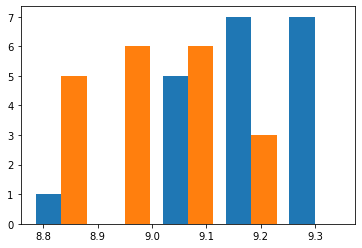

In [ ]:
plt.hist([errs*100, fixerrs*100], bins=5)